In [91]:
import numpy as np
from matplotlib import pyplot as plt
from tabulate import tabulate
from sympy import *

In [84]:
#1b

#Givens
T_i = 40 #*C
L = 4e-3 #m
k = 1.4 #W/mK

h_oa = 2 # W/m^2
h_ob = 65 # W/m^2
h_oc = 100 # W/m^2

h_i = 30 #W/m^2

#Functions
def heat_flux(T_o, h):
    return (T_o - T_i) / (1/h + L/k + 1/h_i)

def T_so(T_o, h):
    return T_o - heat_flux(T_o, h)/h

def T_si(T_o, h):
    return T_i + heat_flux(T_o, h)/h_i


#Getting Data
T_inf_outer = np.arange(31) - 30

T_surface_outer_a = np.zeros(31)
T_surface_inner_a = np.zeros(31)

T_surface_outer_b = np.zeros(31)
T_surface_inner_b = np.zeros(31)

T_surface_outer_c = np.zeros(31)
T_surface_inner_c = np.zeros(31)

for i in range(len(T_inf_outer)):
    T_surface_outer_a[i] = T_so(T_inf_outer[i], h_oa)
    T_surface_inner_a[i] = T_si(T_inf_outer[i], h_oa)
    
    T_surface_outer_b[i] = T_so(T_inf_outer[i], h_ob)
    T_surface_inner_b[i] = T_si(T_inf_outer[i], h_ob)
    
    T_surface_outer_c[i] = T_so(T_inf_outer[i], h_oc)
    T_surface_inner_c[i] = T_si(T_inf_outer[i], h_oc)

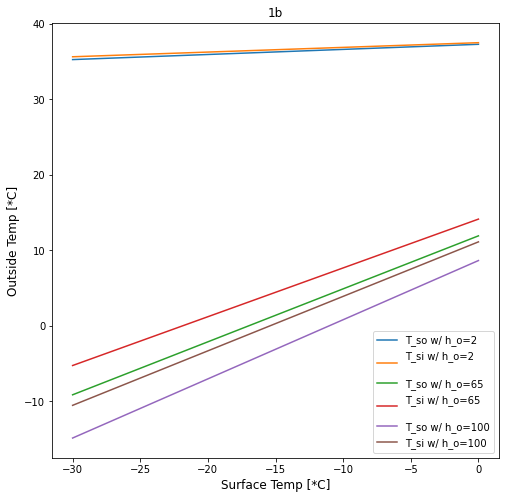

In [90]:
#Graphs
plt.rcParams['axes.facecolor']='White'
plt.rcParams['savefig.facecolor']='White'

plt.figure(figsize=(8,8))
plt.plot(T_inf_outer, T_surface_outer_a, label='T_so w/ h_o=' + str(h_oa))
plt.plot(T_inf_outer, T_surface_inner_a, label='T_si w/ h_o=' + str(h_oa) + '\n')

plt.plot(T_inf_outer, T_surface_outer_b, label='T_so w/ h_o=' + str(h_ob))
plt.plot(T_inf_outer, T_surface_inner_b, label='T_si w/ h_o=' + str(h_ob) + '\n')

plt.plot(T_inf_outer, T_surface_outer_c, label='T_so w/ h_o=' + str(h_oc))
plt.plot(T_inf_outer, T_surface_inner_c, label='T_si w/ h_o=' + str(h_oc))

plt.title('1b')
plt.xlabel('Surface Temp [*C]', fontsize=12)
plt.ylabel('Outside Temp [*C]', fontsize=12)

plt.legend()

In [86]:
#Data

tabulated_data = np.zeros((31, 7))

tabulated_data[:,0] = T_inf_outer
tabulated_data[:,1] = T_surface_outer_a
tabulated_data[:,2] = T_surface_inner_a
tabulated_data[:,3] = T_surface_outer_b
tabulated_data[:,4] = T_surface_inner_b
tabulated_data[:,5] = T_surface_outer_c
tabulated_data[:,6] = T_surface_inner_c

print(tabulate(tabulated_data, headers=['Temp [*C]', 'T_so, K=2', 'T_si, K=2', 'T_so, K=65', 'T_si, K=65', 'T_so, K=100', 'T_si, K=100']))

  Temp [*C]    T_so, K=2    T_si, K=2    T_so, K=65    T_si, K=65    T_so, K=100    T_si, K=100
-----------  -----------  -----------  ------------  ------------  -------------  -------------
        -30      35.2753      35.6483   -9.11932       -5.24148      -14.8454        -10.5155
        -29      35.3428      35.7105   -8.41761       -4.59517      -14.0619         -9.79381
        -28      35.4103      35.7726   -7.71591       -3.94886      -13.2784         -9.07216
        -27      35.4778      35.8348   -7.0142        -3.30256      -12.4948         -8.35052
        -26      35.5453      35.897    -6.3125        -2.65625      -11.7113         -7.62887
        -25      35.6128      35.9591   -5.6108        -2.00994      -10.9278         -6.90722
        -24      35.6803      36.0213   -4.90909       -1.36364      -10.1443         -6.18557
        -23      35.7478      36.0835   -4.20739       -0.71733       -9.36082        -5.46392
        -22      35.8153      36.1456   -3.50568 

In [212]:
#5b

qdot5 = 4.002e6 #W/m^3
kb5 = 13.5 #W/(mK)

ka5 = 25
kc5 = 50
h5 = 1000

qflux1_5 = 107273 #W/m^2
qflux2_5 = 132857 #W/m^2

T1_5 = 211 #*C
T2_5 = 261 #*C
T_inf5 = 25 #*C
Lb5 = 30e-3 #m

x = S('x')

C1 = (qflux1_5 - qdot5*Lb5) / kb5
C2 = T1_5 + qdot5 / (2*kb5) * Lb5**2 - Lb5 * (qdot5 * Lb5 - qflux1_5) / kb5 + 50

Tb5 = -qdot5/(2*kb5)*x**2 + C1*x + C2
Tb5

-148222.222222222*x**2 - 947.185185185185*x + 365.984444444444

Text(0.5, 1.0, '5b')

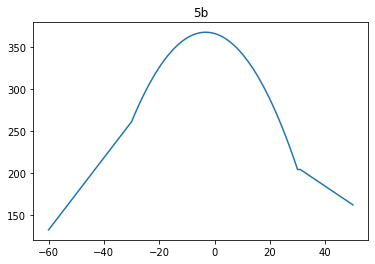

In [355]:
#Data

distance5 = (np.arange(111) - 60)#*1e-3
temp5 = np.zeros(111)

Ta5 = qflux1_5 / h5 + T_inf5
temp5[0] = Ta5
ma5 = (Ta5 - T_inf5) / 25

Tc5 = qflux2_5 / h5 + T_inf5
mc5 = (Tc5 - T_inf5) / 60

for i in range(61):
    j = (i-30)*1e-3
    temp5[i+30] = Tb5.subs(x,j)

for i in range(29):
    temp5[i+1] = temp5[0] + ma5*(i+1)
    
for i in range(20):
    temp5[i+91] = temp5[90] - i*mc5
    

#temp5[29] = 0
#temp[30] != 0

plt.plot(distance5,temp5)
plt.title('5b')

360.00444444444446

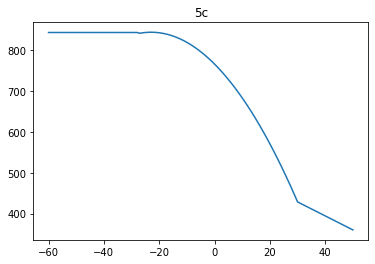

In [354]:
#5c

temp5c = np.zeros(111)

#for i in range(30):
#    temp5c[i] = 820

Tb5c = -qdot5/(2*kb5)*x**2 + C2 - 6800*x + 400

for i in range(61):
    j = (i-30)*1e-3
    temp5c[i+30] = Tb5c.subs(x,j)
    
for i in range(33):
    temp5c[i] = temp5c[35]

for i in range(21):
    temp5c[i+90] = temp5c[90] - i*3.429

plt.plot(distance5,temp5c)
plt.title('5c')
temp5c[-1]

Text(0.5, 1.0, '7')

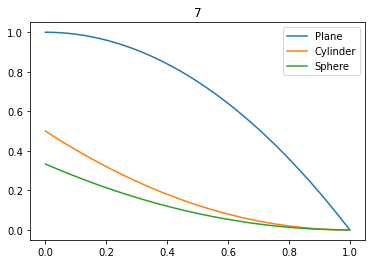

In [353]:
#7
ra7 = S('ratio')

plan7 = 1 - ra7**2
cyli7 = .5*((1-ra7)**2)
sphe7 = .333333*((1-ra7)**2)

ratio = np.arange(1001) / 1000

vp7 = np.zeros(1001)
vc7 = np.zeros(1001)
vs7 = np.zeros(1001)

for i in range(1001):
    vp7[i] = plan7.subs(ra7,ratio[i])
    vc7[i] = cyli7.subs(ra7,ratio[i])
    vs7[i] = sphe7.subs(ra7,ratio[i])
    
plt.plot(ratio, vp7, label="Plane")
plt.plot(ratio, vc7, label="Cylinder")
plt.plot(ratio, vs7, label="Sphere")
plt.legend()
plt.title('7')